<a href="https://colab.research.google.com/github/YatindraRai002/Neural-Network/blob/main/Handwritten_Digit_Classification_using_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from  tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_test.shape

(10000, 28, 28)

In [7]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

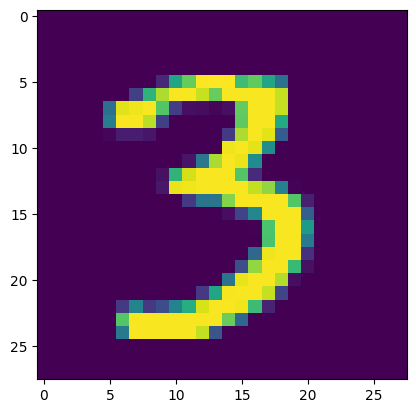

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10000])

In [12]:
X_train=X_train/255
X_test=X_test/255

In [13]:
X_train[10000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.31)

Epoch 1/100
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8429 - loss: 0.5459 - val_accuracy: 0.9496 - val_loss: 0.1662
Epoch 2/100
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9606 - loss: 0.1336 - val_accuracy: 0.9602 - val_loss: 0.1377
Epoch 3/100
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9741 - loss: 0.0822 - val_accuracy: 0.9639 - val_loss: 0.1196
Epoch 4/100
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9808 - loss: 0.0628 - val_accuracy: 0.9689 - val_loss: 0.1085
Epoch 5/100
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9851 - loss: 0.0463 - val_accuracy: 0.9707 - val_loss: 0.1009
Epoch 6/100
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9669 - val_loss: 0.1199
Epoch 7/100
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9899 - loss: 0.0293 - val_accuracy: 0.9691 - val_loss: 0.1114
Epoch 8/100
1294/1294 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9933 - loss

In [19]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9772

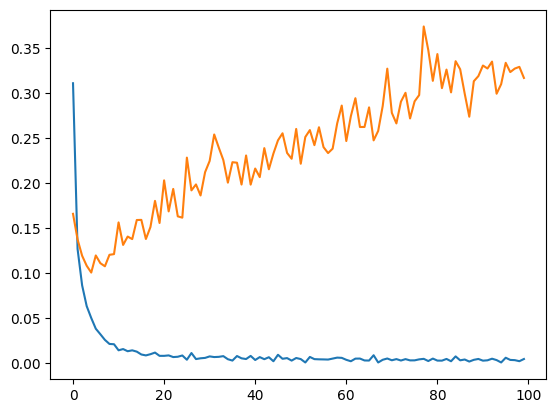

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

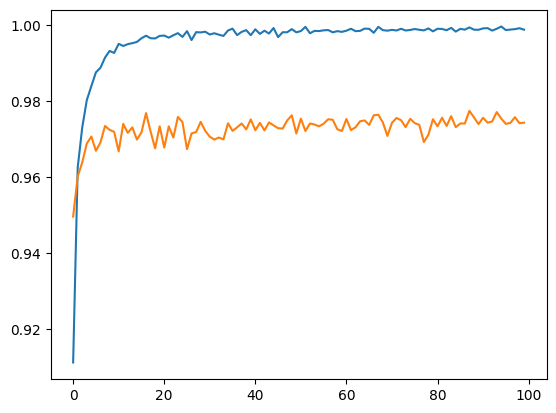

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

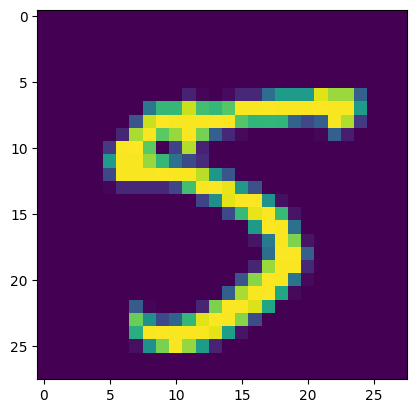

In [25]:
plt.imshow(X_test[102])

In [24]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([2])